## Data

The animal audiograms database contains 2 audiograms of manatees in water, however, one audiogram is irregular (hearing damage?). Only [1 audiogram](https://animalaudiograms.museumfuernaturkunde.berlin/audiogram?ids=110) was used here.

The audiogram for the manatee was downloaded and stored in the file `data/Trichechus_manatus.csv`.

In [1]:
# import the FFT scripts
source("FFT.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Read the downloaded data
data_file <- "./data/Trichechus_manatus.csv"
audiogram <- read.table(data_file, header=TRUE, sep=",")

## Computing the effective hearing range
The data can now be loaded to estimate the functional hearing range, i.e. the lowest and highest frequency that caused a measurable response in any audiogram of this species.

[1] "lowest frequency in effective hearing range: 0.5 kHz"
[1] "highest frequency in effective hearing range: 38 kHz"


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



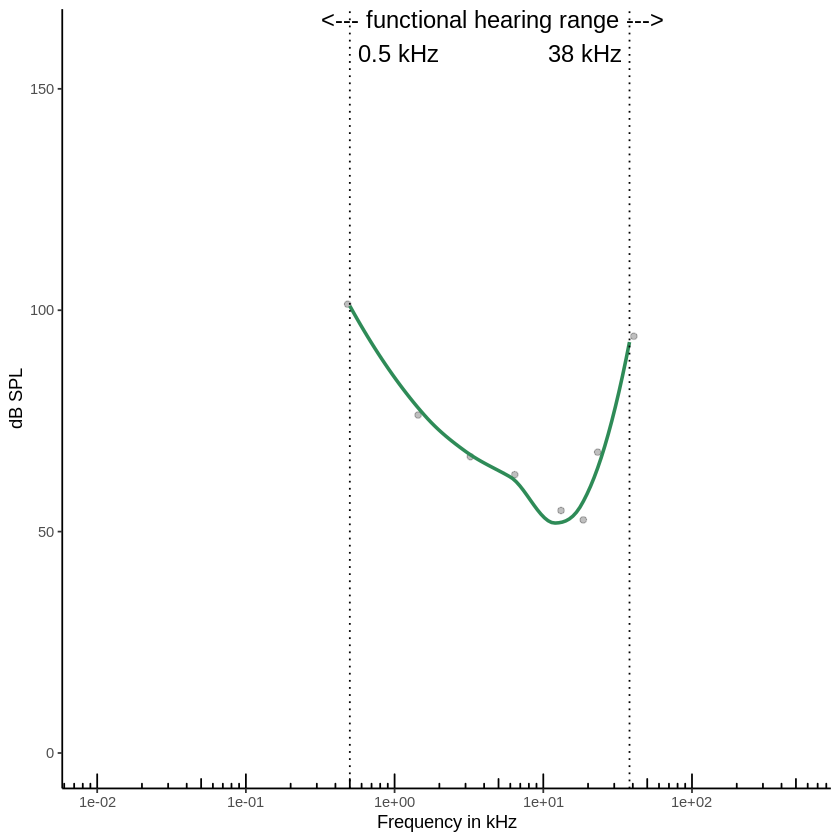

In [3]:
# compute the functional hearing frequency range
range <- def.f.range(audiogram)

print(paste("lowest frequency in effective hearing range:",range$eff.freq.low, "kHz"))
print(paste("highest frequency in effective hearing range:", round(range$eff.freq.high), "kHz"))

# plot the data, the fit curve, and the effective hearing range
plot.effective(audiogram, range)

## Defining the filter values
Filter weights are computed by applying the M-weighting function described in Southall et al. (2007), appendix A, p. 500

Frequency.in.kHz,Gain.in.dB
<dbl>,<dbl>
0.02000000,-128.2466385
0.04397048,-96.8573099
0.09667017,-65.9258582
0.21253171,-37.0027188
0.46725612,-14.7260434
1.02727387,-3.7264231
2.25848647,-0.4871296
4.96533715,0.0000000
10.91641386,-1.0874901


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



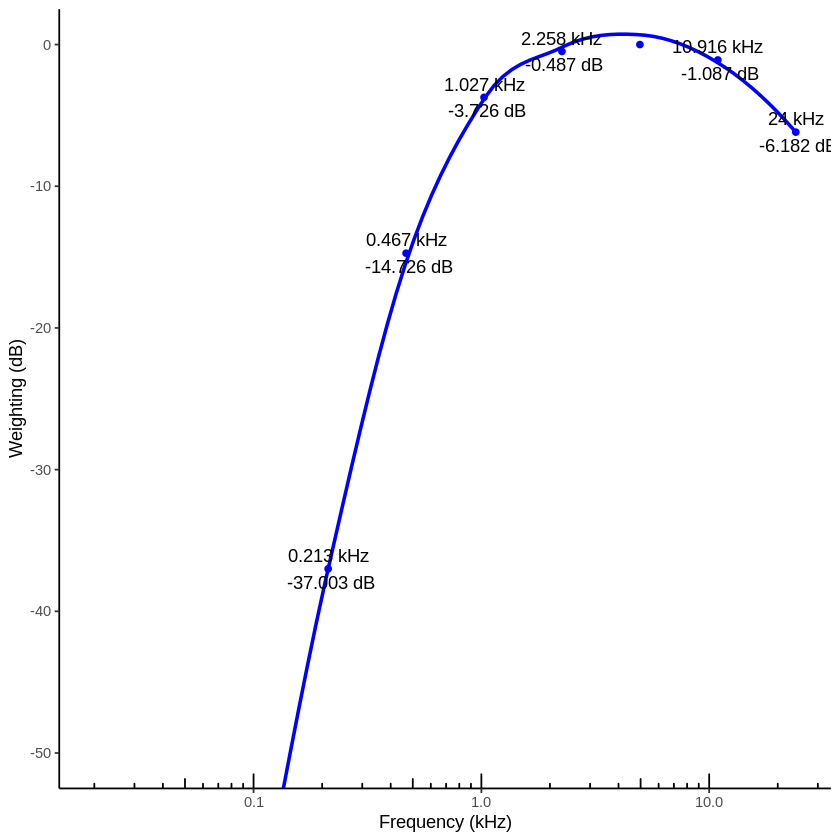

In [4]:
# filter frequencies from 20Hz to 24kHz
seq <- make.f.seq(0.02, 24)

M.table <- make.M.table(seq, range$eff.freq.low, range$eff.freq.high)
M.table

plot.M(M.table, TRUE)

## Implement the filter
Implement a filter using the values from table above. Q is set to 1.414 (1 octave) for a smoother filter curve. The filtered sound is normalized at -3dB.

The generated command can be used to invoque sox by copy-pasting it in a Linux terminal.

In [6]:
# sox command
inputfile <- "data/whitenoise.wav"
outputfile <- "data/ft_M.Trichechus_manatus.mp3"
Q <- 0.7
command <- sox_command(inputfile, outputfile, M.table, Q)
command

[1] "sox data/whitenoise.wav data/ft_M.Trichechus_manatus.mp3 equalizer 20 0.7 -128.246638453045 equalizer 43.9704839121896 0.7 -96.8573099150012 equalizer 96.6701727736063 0.7 -65.9258582195331 equalizer 212.531713836522 0.7 -37.0027188225301 equalizer 467.256115203944 0.7 -14.7260433636903 equalizer 1027.27387482236 0.7 -3.72642307450271 equalizer 2258.48646931447 0.7 -0.487129633514374 equalizer 4965.33714824449 0.7 0 equalizer 10916.4138597741 0.7 -1.08749006910324 norm -3"